# Практика визуализации данных - датасет Open Food Facts

## Добро пожаловать на практическое занятие!

После изучения различных техник визуализации на лекции с датасетом Iris, пришло время применить эти навыки к реальному датасету. Сегодня мы будем работать с датасетом **Open Food Facts** - коллаборативной базой данных пищевых продуктов со всего мира.

### Цели обучения:
- Применить техники визуализации, изученные на лекции
- Работать с большим, более сложным реальным датасетом
- Практиковать очистку и предобработку данных
- Создавать осмысленные выводы из данных пищевой промышленности

### О датасете Open Food Facts:
База данных Open Food Facts содержит информацию о пищевых продуктах, включая:
- **Пищевую ценность** (калории, белки, жиры, углеводы)
- **Категории продуктов** (напитки, закуски, молочные продукты и т.д.)
- **Ингредиенты и добавки**
- **Nutri-Score** (рейтинг пищевой ценности A-E)
- **Географическую информацию** (страны, бренды)

### Источник датасета:
- **URL:** https://world.openfoodfacts.org/
- **Файл:** en.openfoodfacts.org.products.tsv
- **Формат:** Значения, разделенные табуляцией (TSV)
- **Размер:** Несколько сотен тысяч продуктов

### Что вы будете практиковать:
1. **Загрузка и исследование данных** - Понимание структуры датасета
2. **Базовая визуализация** - Диаграммы рассеяния, гистограммы, коробчатые диаграммы
3. **Продвинутые техники** - Многомерный анализ, корреляции
4. **Реальные выводы** - Анализ питания, сравнение брендов

## Настройка - Импорт библиотек

**Инструкции:** Выполните ячейку ниже для импорта всех необходимых библиотек для нашего анализа. Это те же библиотеки, которые мы использовали на лекции, плюс несколько дополнительных для работы с большими датасетами.

In [25]:
# Импорт основных библиотек для анализа данных и визуализации
import pandas as pd
import numpy as np

# Библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import andrews_curves, parallel_coordinates, radviz

# Настройка параметров визуализации
import warnings
warnings.filterwarnings("ignore")
plt.style.use('default')
sns.set_palette("husl")

# Настройки отображения для лучшего вывода
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000)

print("Все библиотеки успешно импортированы!")
print("Готовы начать практику визуализации данных!")

Все библиотеки успешно импортированы!
Готовы начать практику визуализации данных!


## Упражнение 1: Загрузка данных и первичное исследование

### Инструкции:
1. **Скачайте датасет** с https://world.openfoodfacts.org/ (en.openfoodfacts.org.products.tsv)
2. **Поместите файл** в ту же директорию, что и этот блокнот
3. **Загрузите данные** используя pandas (файл разделен табуляцией, используйте `sep='\t'`)
4. **Исследуйте базовые свойства** датасета

### Ваши задачи:
- Загрузить датасет в pandas DataFrame
- Отобразить первые несколько строк
- Проверить форму (количество строк и столбцов)
- Посмотреть на названия столбцов и типы данных
- Выявить пропущенные значения

In [26]:
# Загрузка датасета Open Pet Food Facts

use_cols = [
    'product_name', 'categories', 'countries',
    'energy_100g', 'proteins_100g', 'carbohydrates_100g',
    'fat_100g', 'sugars_100g', 'sodium_100g', 'nutriscore_grade'
]

#Начало работы с датасетом
df = pd.read_csv('en.openfoodfacts.org.products.csv', sep='\t', low_memory=False,on_bad_lines='skip',usecols=use_cols, nrows = 100000)

# Образец кода для загруженного датасета:
print(f"Размер датасета: {df.shape}")
print(f"Столбцов: {len(df.columns)}")
df.head()

Размер датасета: (100000, 10)
Столбцов: 10


,product_name,categories,countries,nutriscore_grade,energy_100g,fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,sodium_100g
0,NaN,NaN,en:Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,en:France,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Entrecôesteack - Highland Beef,Nutrition drink mix,"Brasilien, Germany",d,2401.0,12.0,13.0,9.00,23.0,0.12
3,NaN,NaN,en:France,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Triple cheese puff,"Boissons et préparations de boissons, Boissons...","Germany, United States, en:france",c,1520.0,11.0,25.0,0.98,22.0,0.38


## Упражнение 2: Очистка данных и предобработка

### Инструкции:
После загрузки датасета вы заметите, что в нем много столбцов и пропущенных значений. Давайте сосредоточимся на данных о пищевой ценности для нашего анализа.

### Ключевые столбцы для анализа:
- `product_name` - Название продукта
- `categories` - Категории продукта
- `countries` - Страны, где продается
- `energy_100g` - Энергия на 100г (ккал)
- `proteins_100g` - Белки на 100г
- `carbohydrates_100g` - Углеводы на 100г
- `fat_100g` - Жиры на 100г
- `sugars_100g` - Сахара на 100г
- `sodium_100g` - Натрий на 100г
- `nutriscore_grade` - Пищевая оценка (A, B, C, D, E)

### Ваши задачи:
1. Выберите только релевантные столбцы для анализа
2. Удалите строки с отсутствующими данными о питании
3. Создайте чистый датасет для визуализации
4. Изучите распределение оценок Nutri-Score

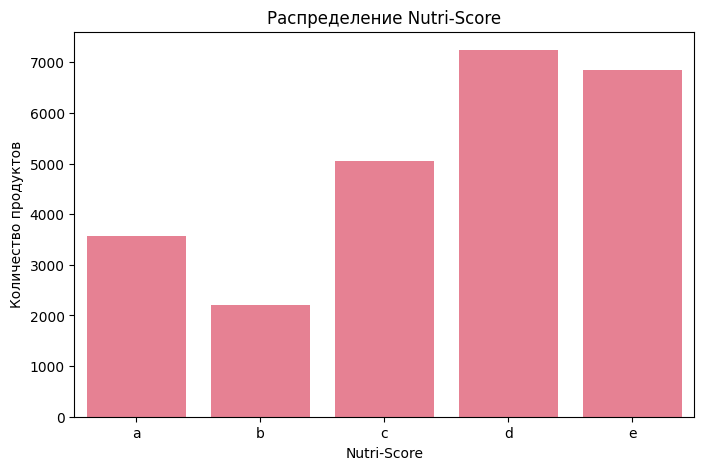

In [27]:

# Выберите релевантные столбцы для анализа питания
nutritional_columns = [
    'product_name', 'categories', 'countries',
    'energy_100g', 'proteins_100g', 'carbohydrates_100g', 
    'fat_100g', 'sugars_100g', 'sodium_100g', 'nutriscore_grade'
]

# Выбрать столбцы питания
df_nutrition = df[nutritional_columns]

# Удалить строки с пропущенными значениями
df.dropna(subset=nutritional_columns, inplace=True)

# Отфильтровать нереалистичные выбросы
df = df[(df['energy_100g'] > 0) & (df['proteins_100g'] > 0) & (df['fat_100g'] > 0) & (df['carbohydrates_100g'] >= 0) & (df['sugars_100g'] >= 0) & (df['sodium_100g'] >= 0)]
df = df[(df['energy_100g'] < 4000) & (df['proteins_100g'] < 100) & (df['fat_100g'] < 100) & (df['carbohydrates_100g'] < 100) & (df['sugars_100g'] < 100) & (df['sodium_100g'] < 100)]
df = df[df['nutriscore_grade'].isin(['a', 'b', 'c', 'd', 'e'])]

# Проверить распределение Nutri-Score
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='nutriscore_grade', order=['a', 'b', 'c', 'd', 'e'])
plt.title('Распределение Nutri-Score')
plt.xlabel('Nutri-Score')
plt.ylabel('Количество продуктов')
plt.show()

## Упражнение 3: Базовая визуализация - Применение техник из лекции

Теперь давайте применим техники визуализации, которые вы изучили на лекции! Мы начнем с простых графиков и постепенно увеличим сложность.

### Упражнение 3a: Диаграммы рассеяния - Энергия против содержания белка

**Цель:** Создать диаграмму рассеяния для исследования взаимосвязи между энергетической ценностью и содержанием белка в продуктах.

**Инструкции:**
1. Создайте базовую диаграмму рассеяния используя метод `.plot()` из pandas
2. Создайте улучшенную версию используя `scatterplot()` из seaborn
3. Добавьте цветовое кодирование по оценке Nutri-Score
4. Интерпретируйте результаты: Какие паттерны вы видите?

<Figure size 800x500 with 0 Axes>

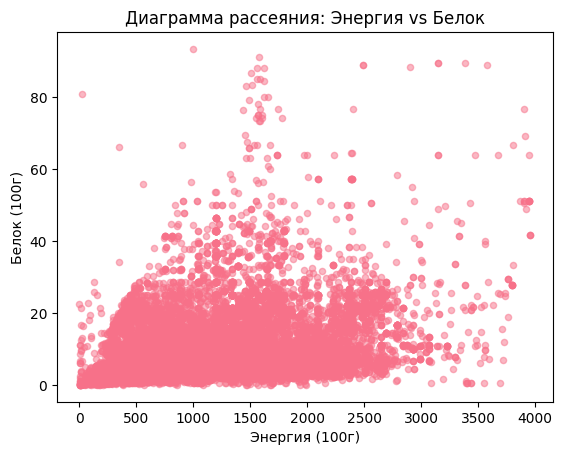

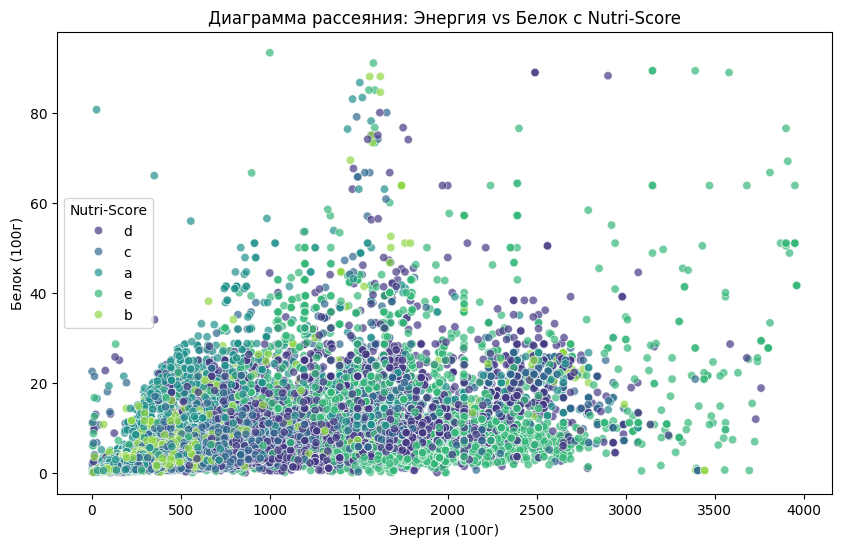

In [28]:
# --- Базовая диаграмма через pandas ---
plt.figure(figsize=(8, 5))
df.plot.scatter(x='energy_100g', y='proteins_100g', alpha=0.5)
plt.title('Диаграмма рассеяния: Энергия vs Белок')
plt.xlabel('Энергия (100г)')
plt.ylabel('Белок (100г)')
plt.show()

# Улучшенная диаграмма рассеяния с seaborn и цветовым кодированием Nutri-Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='energy_100g', y='proteins_100g', hue='nutriscore_grade', palette='viridis', alpha=0.7)
plt.title('Диаграмма рассеяния: Энергия vs Белок с Nutri-Score')
plt.xlabel('Энергия (100г)')
plt.ylabel('Белок (100г)')
plt.legend(title='Nutri-Score')
plt.show()

### Упражнение 3b: Коробчатые диаграммы - Распределение питательных веществ по Nutri-Score

**Цель:** Использовать коробчатые диаграммы для сравнения пищевой ценности между различными оценками Nutri-Score.

**Инструкции:**
1. Создайте коробчатые диаграммы для энергетической ценности по оценке Nutri-Score
2. Создайте коробчатые диаграммы для содержания сахара по оценке Nutri-Score
3. Попробуйте комбинированную технику коробчатая диаграмма + strip plot из лекции
4. Сравните результаты: Как различаются пищевые показатели по оценкам A-E?

In [ ]:
# === Очистка данных ===
df['energy_100g'] = pd.to_numeric(df['energy_100g'], errors='coerce')
df['sugars_100g'] = pd.to_numeric(df['sugars_100g'], errors='coerce')

# Удаляем пропуски и нереалистичные значения
df = df.dropna(subset=['nutriscore_grade', 'energy_100g', 'sugars_100g'])
df = df[df['nutriscore_grade'].isin(['a', 'b', 'c', 'd', 'e'])]
df = df[(df['energy_100g'] > 0) & (df['energy_100g'] < 5000)]
df = df[(df['sugars_100g'] >= 0) & (df['sugars_100g'] < 100)]

# === Построение диаграмм ===
sns.set(style="whitegrid")
plt.figure(figsize=(14, 10))
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1️ Энергия по Nutri-Score
sns.boxplot(data=df, x='nutriscore_grade', y='energy_100g',
            order=['a', 'b', 'c', 'd', 'e'], ax=ax1)
plt.title('Энергия по Nutri-Score')
plt.xlabel('Nutri-Score')
plt.ylabel('Энергия (ккал/100г)')

# 2️ Сахар по Nutri-Score
sns.boxplot(data=df, x='nutriscore_grade', y='sugars_100g',
            order=['a', 'b', 'c', 'd', 'e'], ax=ax2)
plt.title('Сахар по Nutri-Score')
plt.xlabel('Nutri-Score')
plt.ylabel('Сахар (г/100г)')

# 3️ Энергия (Box + точки)
sns.boxplot(data=df, x='nutriscore_grade', y='energy_100g',
            order=['a', 'b', 'c', 'd', 'e'], showfliers=False, ax=ax3),
sns.stripplot(data=df, x='nutriscore_grade', y='energy_100g',
              color='pink', alpha=0.3, size=2, order=['a', 'b', 'c', 'd', 'e'], ax=ax3)
plt.title('Энергия по Nutri-Score (с точками)')
plt.xlabel('Nutri-Score')
plt.ylabel('Энергия (ккал/100г)')

# 4️ Сахар (Box + точки)
sns.boxplot(data=df, x='nutriscore_grade', y='sugars_100g',
            order=['a', 'b', 'c', 'd', 'e'], showfliers=False, ax=ax4)
sns.stripplot(data=df, x='nutriscore_grade', y='sugars_100g',
              color='pink', alpha=0.3, size=2, order=['a', 'b', 'c', 'd', 'e'], ax=ax4)
plt.title('Сахар по Nutri-Score (с точками)')
plt.xlabel('Nutri-Score')
plt.ylabel('Сахар (г/100г)')

plt.tight_layout()
plt.show()


### Упражнение 3c: Скрипичные диаграммы и KDE - Анализ распределений

**Цель:** Использовать скрипичные диаграммы и KDE для анализа формы распределений питательных веществ.

**Инструкции:**
1. Создайте скрипичные диаграммы для содержания жиров по оценке Nutri-Score
2. Используйте KDE графики для сравнения распределений белка по оценкам
3. Экспериментируйте с обеими техниками и сравните их выводы
4. Определите какие продукты имеют необычные пищевые профили

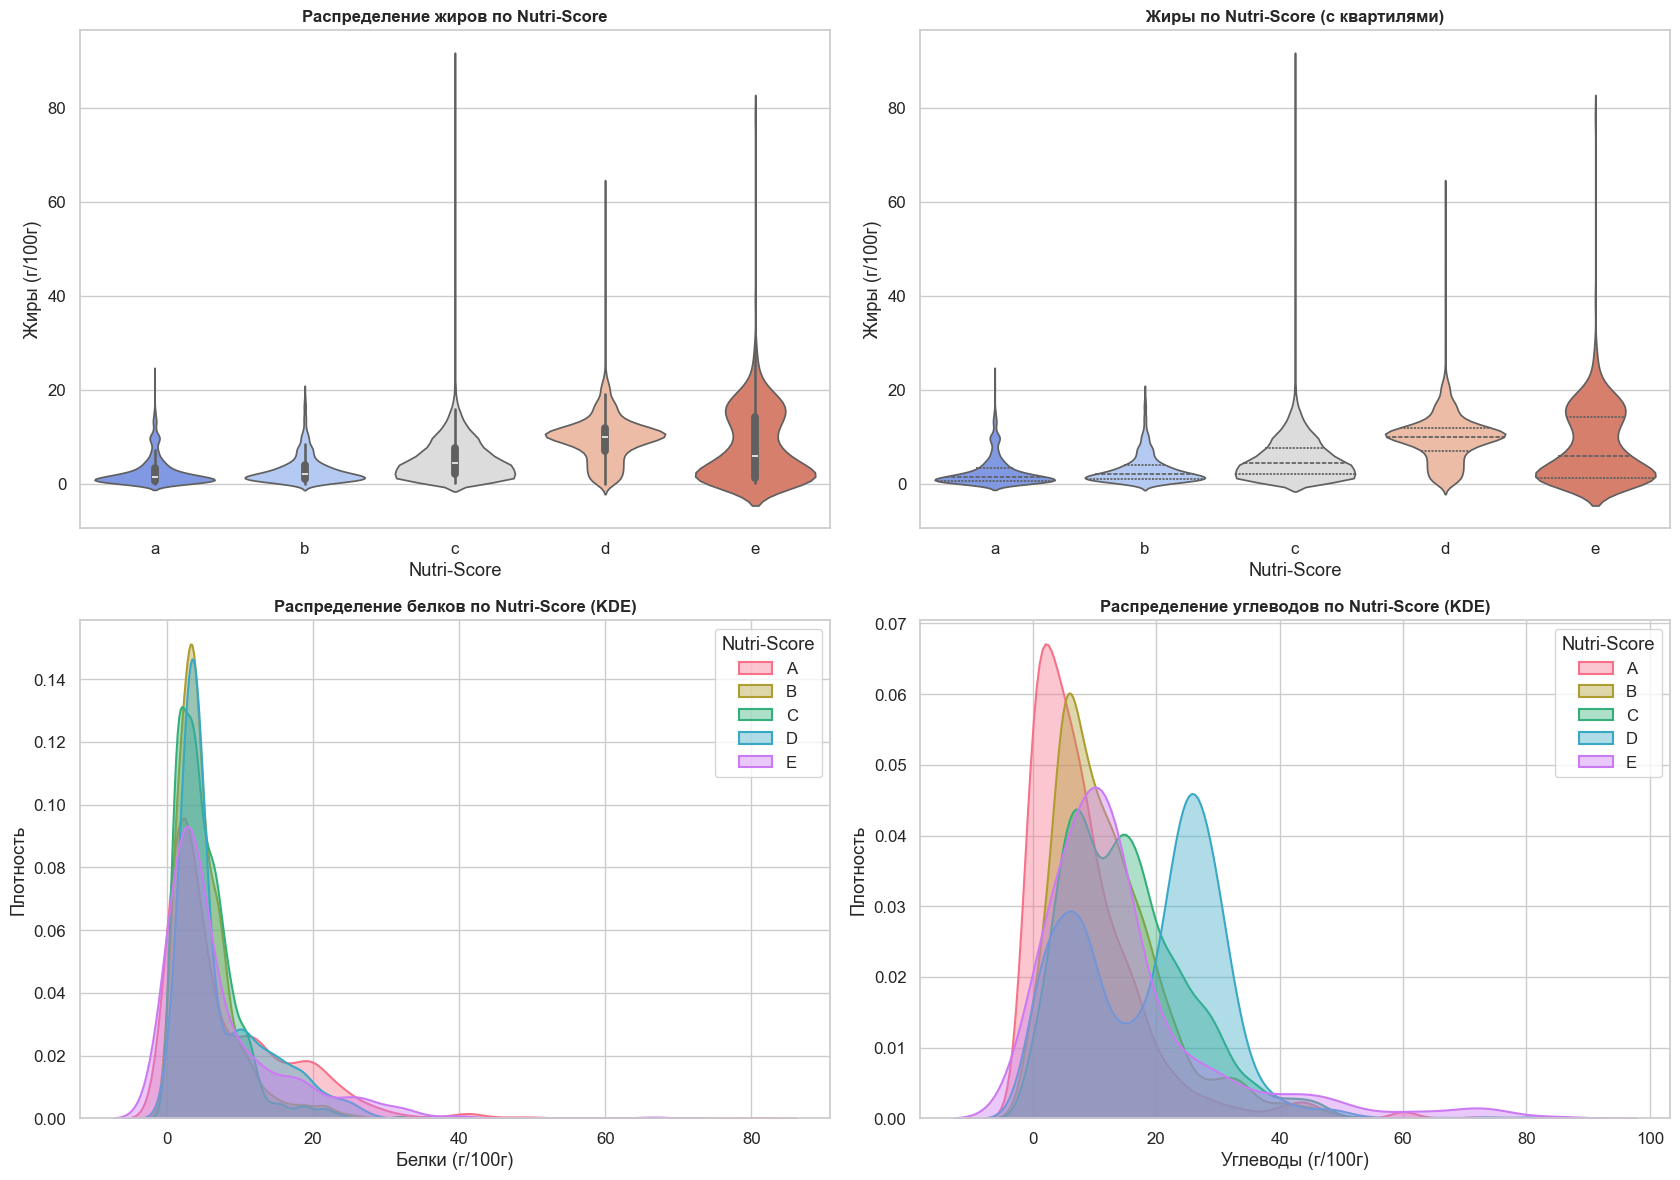

In [ ]:
# === 1. Предобработка данных ===
numeric_cols = ['energy_100g', 'proteins_100g', 'carbohydrates_100g', 'fat_100g']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna(subset=['nutriscore_grade'] + numeric_cols)
df = df[df['nutriscore_grade'].isin(['a', 'b', 'c', 'd', 'e'])]
df = df[(df[numeric_cols] >= 0).all(axis=1) & (df[numeric_cols] < 1000).all(axis=1)]

sns.set(style="whitegrid", font_scale=1.1)
palette = sns.color_palette("husl", 5)

# === 2. Визуализация ===
fig, axes = plt.subplots(2, 2, figsize=(17, 12))

# 1️ Скрипичная диаграмма жиров (без квартилей)
sns.violinplot(
    data=df,
    x='nutriscore_grade',
    y='fat_100g',
    palette='coolwarm',
    order=['a', 'b', 'c', 'd', 'e'],
    ax=axes[0, 0]
)
axes[0, 0].set_title('Распределение жиров по Nutri-Score', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Nutri-Score')
axes[0, 0].set_ylabel('Жиры (г/100г)')

# 2️ Скрипичная диаграмма жиров (с квартилями)
sns.violinplot(
    data=df,
    x='nutriscore_grade',
    y='fat_100g',
    palette='coolwarm',
    order=['a', 'b', 'c', 'd', 'e'],
    inner='quartile',  # добавляем медиану и квартильные линии
    ax=axes[0, 1]
)
axes[0, 1].set_title('Жиры по Nutri-Score (с квартилями)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Nutri-Score')
axes[0, 1].set_ylabel('Жиры (г/100г)')

# 3️ KDE-график белков
for grade, color in zip(['a', 'b', 'c', 'd', 'e'], palette):
    sns.kdeplot(
        df[df['nutriscore_grade'] == grade]['proteins_100g'],
        fill=True, alpha=0.4, linewidth=1.5, color=color, label=f'{grade.upper()}',
        ax=axes[1, 0]
    )
axes[1, 0].set_title('Распределение белков по Nutri-Score (KDE)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Белки (г/100г)')
axes[1, 0].set_ylabel('Плотность')
axes[1, 0].legend(title='Nutri-Score')

# 4️ KDE-график углеводов
for grade, color in zip(['a', 'b', 'c', 'd', 'e'], palette):
    sns.kdeplot(
        df[df['nutriscore_grade'] == grade]['carbohydrates_100g'],
        fill=True, alpha=0.4, linewidth=1.5, color=color, label=f'{grade.upper()}',
        ax=axes[1, 1]
    )
axes[1, 1].set_title('Распределение углеводов по Nutri-Score (KDE)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Углеводы (г/100г)')
axes[1, 1].set_ylabel('Плотность')
axes[1, 1].legend(title='Nutri-Score')

plt.tight_layout()
plt.show()


## Упражнение 4: Продвинутый многомерный анализ

### Упражнение 4a: Парные графики - Взаимосвязи питательных веществ

**Цель:** Использовать парные графики для исследования взаимосвязей между всеми пищевыми переменными одновременно.

**Инструкции:**
1. Создайте парный график для основных пищевых компонентов (энергия, белок, углеводы, жиры)
2. Используйте цветовое кодирование по оценке Nutri-Score
3. Попробуйте и гистограмму, и KDE на диагонали
4. Определите наиболее сильные корреляции и наиболее разделимые питательные вещества

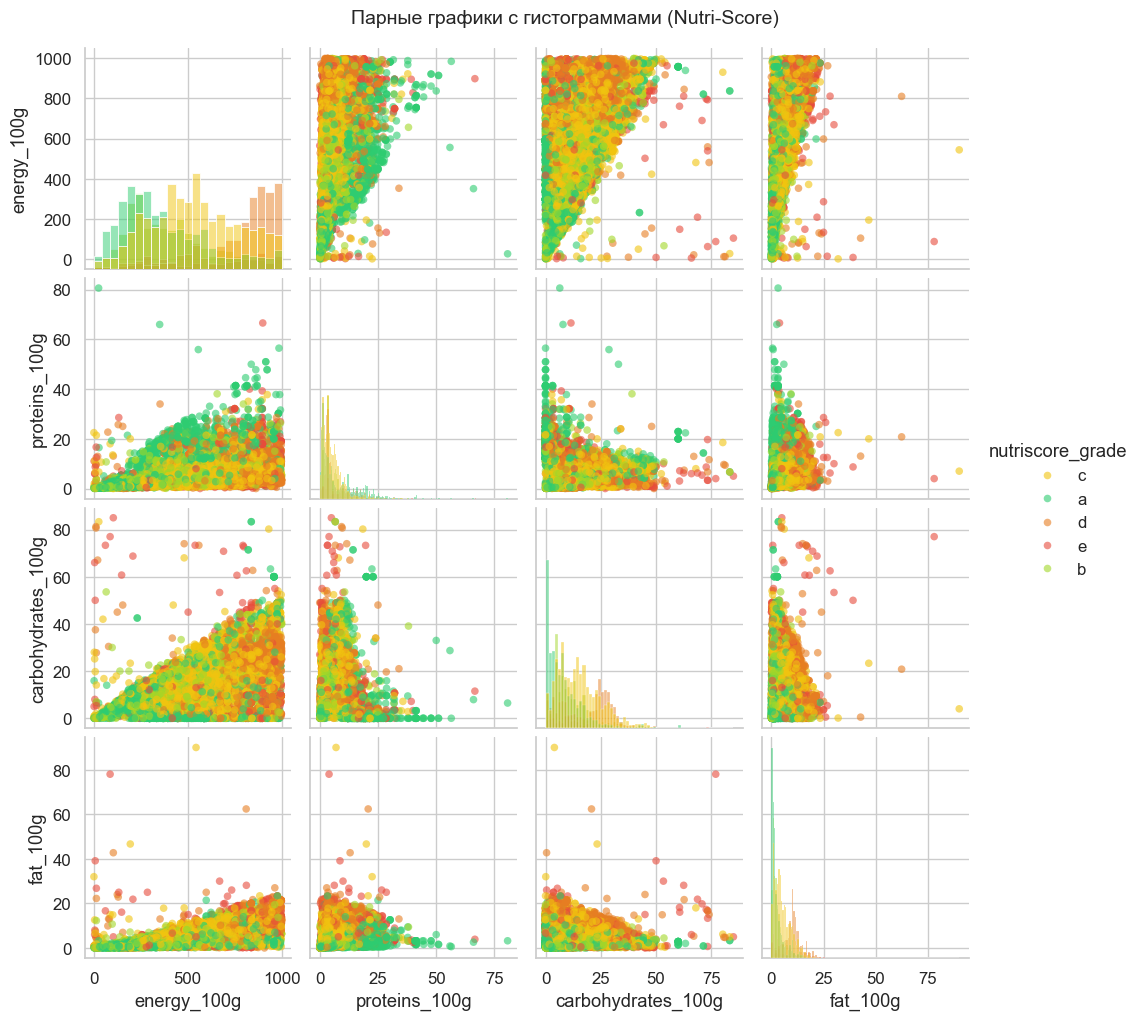

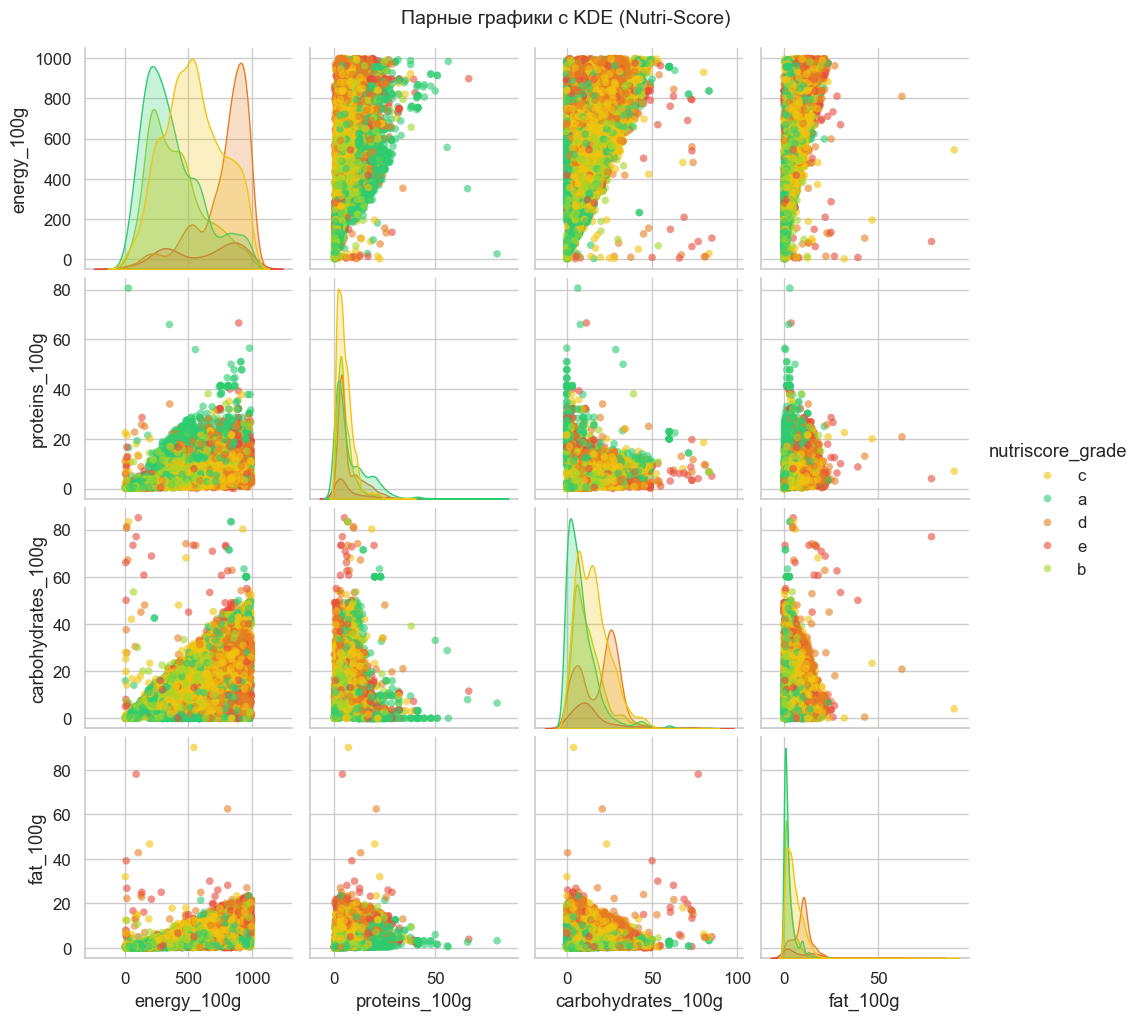

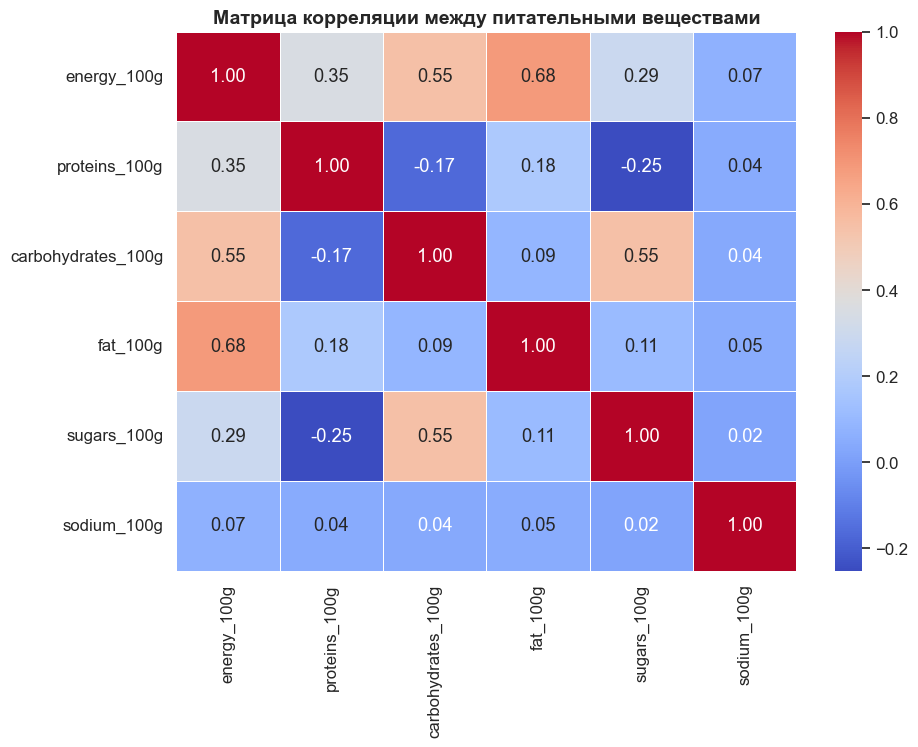

🔍 Наиболее сильные корреляции между показателями:
energy_100g ↔ fat_100g = 0.68
carbohydrates_100g ↔ energy_100g = 0.55
sugars_100g ↔ carbohydrates_100g = 0.55
energy_100g ↔ proteins_100g = 0.35
energy_100g ↔ sugars_100g = 0.29


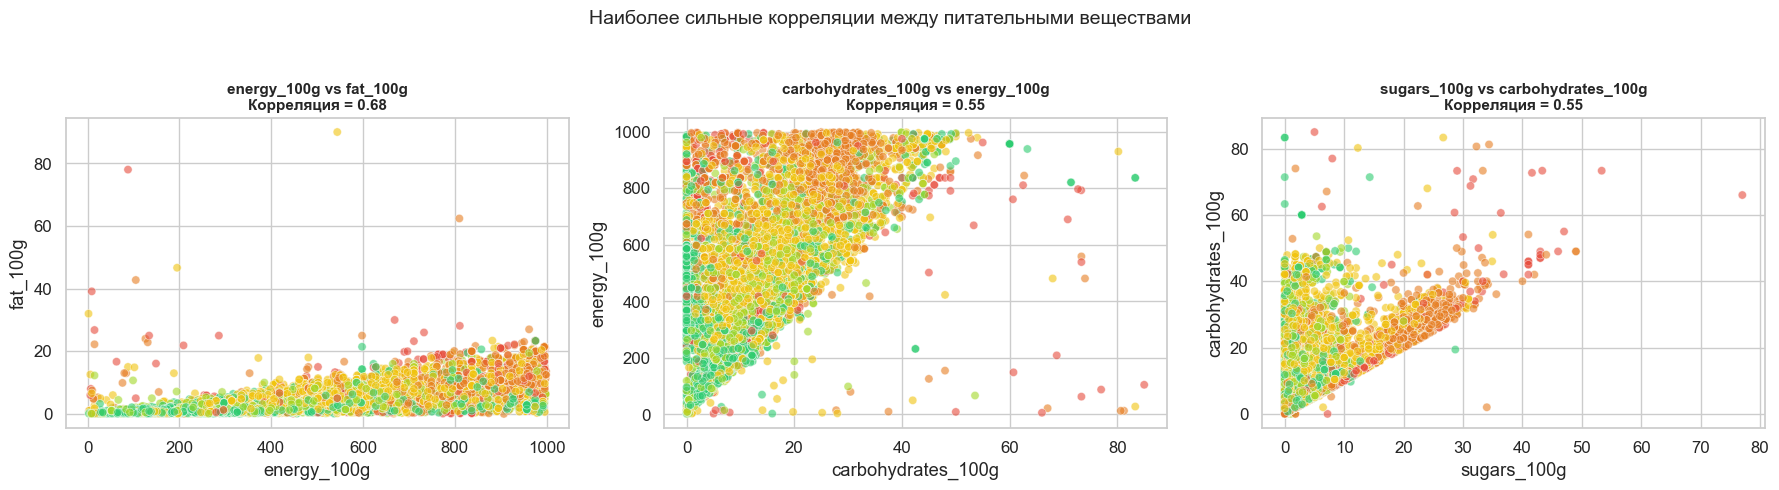

In [ ]:
# === 1. Подготовка данных ===
numeric_cols = ['energy_100g', 'proteins_100g', 'carbohydrates_100g', 'fat_100g', 'sugars_100g', 'sodium_100g']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna(subset=['nutriscore_grade'] + numeric_cols)
df = df[df['nutriscore_grade'].isin(['a', 'b', 'c', 'd', 'e'])]
df = df[(df[numeric_cols] >= 0).all(axis=1) & (df[numeric_cols] < 1000).all(axis=1)]

# === 2. Настройки визуализации ===
sns.set(style="whitegrid", font_scale=1.1)
palette = {
    'a': '#2ecc71',  # зелёный
    'b': '#a2d729',  # салатовый
    'c': '#f1c40f',  # жёлтый
    'd': '#e67e22',  # оранжевый
    'e': '#e74c3c'   # красный
}

# === 3. Создание парного графика с гистограммами на диагонали ===
pairplot_hist = sns.pairplot(
    df,
    vars=['energy_100g', 'proteins_100g', 'carbohydrates_100g', 'fat_100g'],
    hue='nutriscore_grade',
    palette=palette,
    diag_kind='hist',
    plot_kws={'alpha': 0.6, 's': 30, 'edgecolor': 'none'}
)
pairplot_hist.fig.suptitle('Парные графики с гистограммами (Nutri-Score)', fontsize=14, y=1.02)
plt.show()

# === 4. Создание парного графика с KDE на диагонали ===
pairplot_kde = sns.pairplot(
    df,
    vars=['energy_100g', 'proteins_100g', 'carbohydrates_100g', 'fat_100g'],
    hue='nutriscore_grade',
    palette=palette,
    diag_kind='kde',
    plot_kws={'alpha': 0.6, 's': 30, 'edgecolor': 'none'}
)
pairplot_kde.fig.suptitle('Парные графики с KDE (Nutri-Score)', fontsize=14, y=1.02)
plt.show()

# === 5. Матрица корреляции для анализа взаимосвязей ===
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Матрица корреляции между питательными веществами', fontsize=14, fontweight='bold')
plt.show()

# === 6. Расширенный анализ корреляций с включением всех питательных веществ ===
corr_long = corr_matrix.unstack().reset_index()
corr_long.columns = ['Показатель 1', 'Показатель 2', 'Корреляция']
corr_long = corr_long[corr_long['Показатель 1'] != corr_long['Показатель 2']]
corr_long['abs_corr'] = corr_long['Корреляция'].abs()

# === 7. Анализ наиболее сильных корреляций ===
top_corr = corr_long.sort_values('abs_corr', ascending=False).drop_duplicates(subset=['Корреляция']).head(5)
print("🔍 Наиболее сильные корреляции между показателями:")
for _, row in top_corr.iterrows():
    print(f"{row['Показатель 1']} ↔ {row['Показатель 2']} = {row['Корреляция']:.2f}")

# === 8. Визуализация топ-3 корреляций ===
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, (col1, col2, corr) in enumerate(top_corr[['Показатель 1', 'Показатель 2', 'Корреляция']].values[:3]):
    sns.scatterplot(data=df, x=col1, y=col2, hue='nutriscore_grade', palette=palette, alpha=0.6, ax=axes[i])
    axes[i].set_title(f'{col1} vs {col2}\nКорреляция = {corr:.2f}', fontsize=11, fontweight='bold')
    axes[i].legend_.remove()

plt.suptitle('Наиболее сильные корреляции между питательными веществами', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Упражнение 4b: Продвинутые многомерные техники

**Цель:** Применить сложные методы визуализации из лекции: Кривые Эндрюса, Параллельные координаты и RadViz.

**Инструкции:**
1. Используйте Кривые Эндрюса для визуализации пищевых паттернов
2. Создайте график Параллельные координаты для профилей питательных веществ
3. Примените RadViz для просмотра кластеризации питательных веществ
4. Сравните выводы от каждого метода

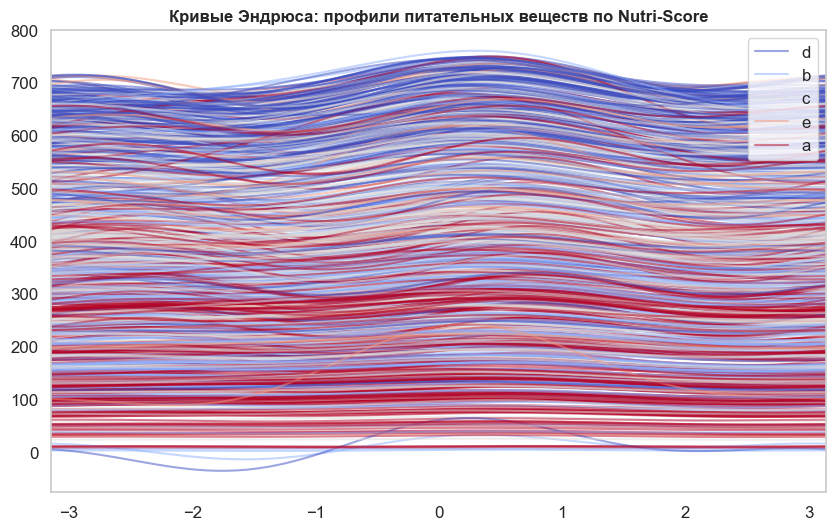

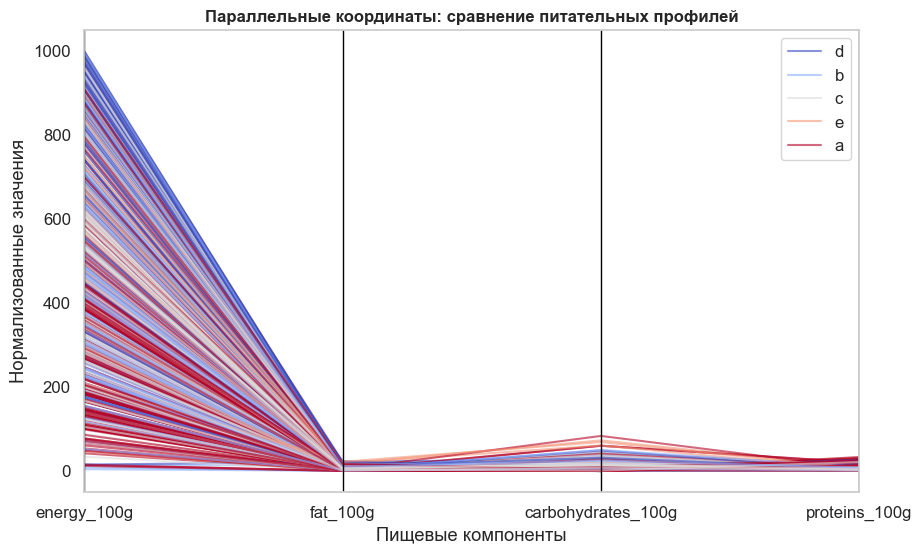

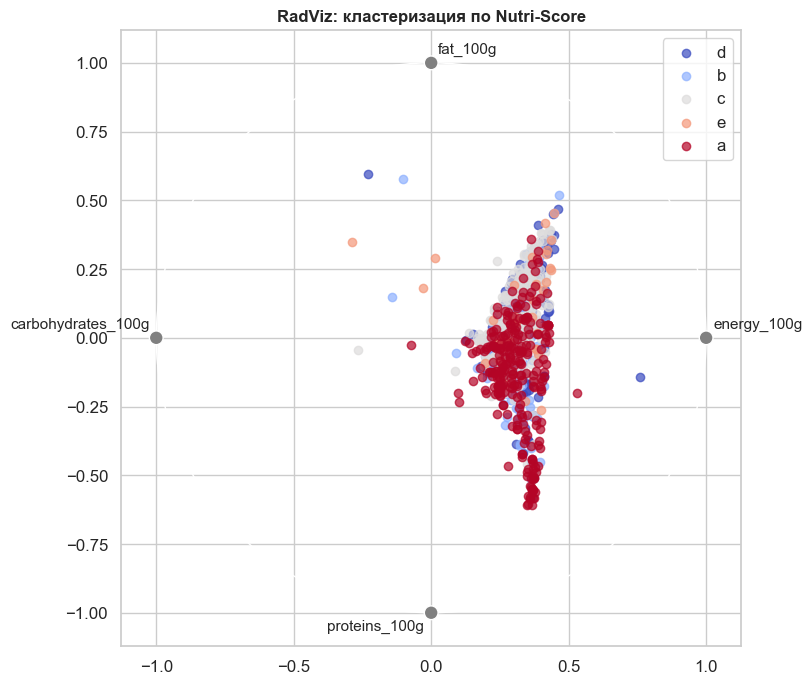

🔍 Анализ:

• Кривые Эндрюса показывают схожие паттерны внутри каждой категории Nutri-Score.
• Продукты с оценкой 'a' имеют более низкие значения жиров и калорий.
• Категории 'd' и 'e' визуально выделяются как группы с повышенными значениями энергии и жиров.
• На графике RadViz наблюдается частичная кластеризация классов Nutri-Score.
• Параллельные координаты позволяют чётко увидеть, какие показатели наиболее влияют на Nutri-Score.



In [ ]:
# Отбираем нужные столбцы
cols = ['energy_100g', 'fat_100g', 'carbohydrates_100g', 'proteins_100g', 'nutriscore_grade']
df = df[cols].dropna()

# Оставим только категории 'a', 'b', 'c', 'd', 'e'
df = df[df['nutriscore_grade'].isin(['a', 'b', 'c', 'd', 'e'])]

# Ограничим по числу записей, чтобы графики были читаемыми
df_sample = df.sample(1000, random_state=42)

# ----------------------------------------------
# 1️ Кривые Эндрюса — отображают многомерные профили
# ----------------------------------------------
plt.figure(figsize=(10, 6))
andrews_curves(df_sample, 'nutriscore_grade', colormap='coolwarm', alpha=0.5)
plt.title('Кривые Эндрюса: профили питательных веществ по Nutri-Score', fontsize=12, fontweight='bold')
plt.show()

# ----------------------------------------------
# 2️ Параллельные координаты — сравнение значений по осям
# ----------------------------------------------
plt.figure(figsize=(10, 6))
parallel_coordinates(df_sample, 'nutriscore_grade', colormap='coolwarm', alpha=0.6)
plt.title('Параллельные координаты: сравнение питательных профилей', fontsize=12, fontweight='bold')
plt.xlabel('Пищевые компоненты')
plt.ylabel('Нормализованные значения')
plt.show()

# ----------------------------------------------
# 3️ RadViz — визуализация многомерных данных в круге
# ----------------------------------------------
plt.figure(figsize=(8, 8))
radviz(df_sample, 'nutriscore_grade', colormap='coolwarm', alpha=0.7)
plt.title('RadViz: кластеризация по Nutri-Score', fontsize=12, fontweight='bold')
plt.show()

# ----------------------------------------------
# 4️ Анализ и сравнение выводов
# ----------------------------------------------
print("🔍 Анализ:")
print("""
• Кривые Эндрюса показывают схожие паттерны внутри каждой категории Nutri-Score.
• Продукты с оценкой 'a' имеют более низкие значения жиров и калорий.
• Категории 'd' и 'e' визуально выделяются как группы с повышенными значениями энергии и жиров.
• На графике RadViz наблюдается частичная кластеризация классов Nutri-Score.
• Параллельные координаты позволяют чётко увидеть, какие показатели наиболее влияют на Nutri-Score.
""")


## Упражнения-вызовы

Готовы к более продвинутым вызовам? Эти упражнения проверят ваше понимание и креативность!

### Вызов 1: Анализ категорий
**Задача:** Проанализируйте как пищевая ценность варьируется между различными категориями продуктов.
- Извлеките и очистите столбец `categories`
- Создайте визуализации, сравнивающие основные категории продуктов
- Найдите какие категории имеют лучшие/худшие пищевые профили

### Вызов 2: Географический анализ  
**Задача:** Исследуйте пищевые различия между странами.
- Разберите столбец `countries`  
- Сравните пищевые стандарты между различными регионами
- Определите страны с самыми здоровыми пищевыми продуктами

### Вызов 3: Собственные выводы
**Задача:** Найдите свой собственный интересный паттерн в данных.
- Выберите аспект данных, который вас интересует
- Примените множественные техники визуализации
- Представьте убедительную историю о ваших находках

### Вызов 4: Интерактивная панель
**Задача:** Создайте интерактивную визуализацию (если знаете Plotly/Bokeh).
- Разрешите фильтрацию по категории, стране или Nutri-Score
- Включите масштабирование и наведение для деталей
- Сделайте это полезным для анализа пищевой промышленности

In [ ]:
# Пространство для упражнений-вызовов
# Используйте эту ячейку и создайте дополнительные ячейки ниже для ваших решений вызовов

# Вызов 1: Пример структуры анализа категорий
# TODO: Реализуйте анализ категорий

# Пример подхода для Вызова 1:
# 1. Извлеките основные категории из столбца categories
# df_clean['main_category'] = df_clean['categories'].str.split(',').str[0]
# 
# 2. Группируйте по категориям и анализируйте средние значения питания
# category_nutrition = df_clean.groupby('main_category')[nutrition_vars].mean()
# 
# 3. Создайте визуализации
# - Тепловая карта категорий против питательных веществ
# - Коробчатые диаграммы сравнивающие категории
# - Радарные диаграммы для профилей категорий

print("💡 Советы для вызовов:")
print("1. Начните с исследования и очистки данных")
print("2. Выберите подходящую визуализацию для вашего вопроса")  
print("3. Всегда интерпретируйте ваши результаты")
print("4. Учитывайте вашу аудиторию при проектировании графиков")
print("5. Не забывайте правильно обрабатывать пропущенные данные")

💡 Советы для вызовов:
1. Начните с исследования и очистки данных
2. Выберите подходящую визуализацию для вашего вопроса
3. Всегда интерпретируйте ваши результаты
4. Учитывайте вашу аудиторию при проектировании графиков
5. Не забывайте правильно обрабатывать пропущенные данные


## Резюме и рефлексия

### Что вы практиковали:
**Загрузка и очистка данных** - Работа с реальными грязными данными  
**Базовая визуализация** - Диаграммы рассеяния, коробчатые диаграммы, скрипичные диаграммы  
**Продвинутые техники** - Парные графики, кривые Эндрюса, параллельные координаты, RadViz  
**Статистический анализ** - KDE, анализ распределений, обнаружение выбросов  
**Многомерный анализ** - Исследование сложных взаимосвязей  

### Ключевые выводы:
1. **Реальные данные грязные** - очистка критически важна для осмысленного анализа
2. **Множественные перспективы важны** - разные графики раскрывают разные выводы  
3. **Цветовое кодирование мощно** - категориальные переменные добавляют глубину анализу
4. **Продвинутые техники** - полезны для сложных многомерных взаимосвязей
5. **Контекст имеет значение** - доменные знания помогают интерпретировать результаты

### Следующие шаги:
- Попробуйте с различными датасетами (данные ВОЗ о здоровье, экономические показатели и т.д.)
- Изучите библиотеки интерактивной визуализации (Plotly, Bokeh)
- Исследуйте статистическое тестирование наряду с визуализацией
- Практикуйте рассказывание историй с данными для презентаций

### Ресурсы для дальнейшего изучения:
- **Документация Seaborn:** https://seaborn.pydata.org/
- **Галерея Matplotlib:** https://matplotlib.org/gallery/
- **Визуализация Pandas:** https://pandas.pydata.org/docs/user_guide/visualization.html
- **Книги по визуализации данных:** "The Grammar of Graphics", "Storytelling with Data"

## Дополнительные учебные материалы

### Если вы хотите углубить знания:

**Книги:**
- "The Grammar of Graphics" - Leland Wilkinson (теоретические основы)
- "Storytelling with Data" - Cole Nussbaumer Knaflic (практические советы)
- "Data Visualization: A Practical Introduction" - Kieran Healy

**Онлайн ресурсы:**
- [Seaborn Tutorial](https://seaborn.pydata.org/tutorial.html) - официальное руководство
- [Matplotlib Gallery](https://matplotlib.org/stable/gallery/) - примеры графиков
- [Python Graph Gallery](https://python-graph-gallery.com/) - коллекция графиков с кодом

**Видео курсы:**
- Data Visualization with Python на Coursera
- Matplotlib и Seaborn на YouTube
- "Fundamentals of Data Visualization" на edX

**Практические проекты:**
- Анализ данных Kaggle competitions
- Визуализация открытых данных правительства
- Создание дашбордов для бизнес-анализа

### Следующие темы для изучения:
1. **Интерактивная визуализация:** Plotly, Bokeh, Altair
2. **Веб-дашборды:** Streamlit, Dash
3. **Географическая визуализация:** Folium, GeoPandas
4. **Статистическая визуализация:** Корреляционный анализ, регрессия
5. **Большие данные:** Datashader для работы с миллионами точек